# Week 6 Overview
This week, we will expand our focus from one variable to multiple variables at a time. We'll start with situations where multiple random variables naturally occur and then look at separating them from each other and conditioning them on each other. We will then use those concepts to define dependence of variables on each other, and use correlations to quantify some of that dependence. This dependence notion will be critical for your later modeling efforts—dependencies will enable interesting predictions, and independent sampling will enable the Central Limit Theorem, which will be introduced next week and which explains why we can be more confident in our estimates as we get more data.

### Learning Objectives
At the end of this week, you should be able to:
- Describe scenarios where multiple random variables occur and how they are linked into a common sample
- Explain the difference between marginal probability and conditional probability
- Extract a marginal probability distribution from a dataset with multiple variables
- Extract a given conditional probability from a dataset
- Visualize conditional probabilities given a dataset and choice of conditioning
- Explain Bayes' Theorem
- Explain what it means for two or more variables to be independent
- Judge whether two variables are likely independent by reviewing a scatter plot
- Describe typical chaining of dependent variables, and recognize unintuitive independence relationships
- State the mathematical definition of correlations and covariances and explain them colloquially
- Compute correlations and covariances with pure Python and NumPy
- Explain the connections between correlations and linear regression

## Topic Overview: Marginal and Conditional Probabilities

### Topic Overview
Our investigation into random variables has been focused on individual variables so far. We will now look into collections of random variables and how they interact with each other. We will start with scenarios where random variables occur together, extract marginal distributions so that we focus on a subset of the variables, and learn how to condition the distributions to match scenarios of interest. This will give us the machinery to investigate how these variables relate to each other in the next topic.

### Learning Objectives
- Describe scenarios where multiple random variables occur and how they are linked into a common sample
- Explain the difference between marginal probability and conditional probability
- Extract a marginal probability distribution from a dataset with multiple variables
- Extract a given conditional probability from a dataset
- Visualize conditional probabilities given a dataset and choice of conditioning
- Explain Bayes' Theorem
### Think About It
- What random variables in your life are connected, and what makes sense to think about separately?

## 6.1 Lesson: Collections of Random Variables
Most natural situations have many random variables that occur together. The weather in Boston tomorrow can be described by several random variables.
- Will it be sunny?
- What will the highest temperature be?
- Will it rain?

Pretty much any imaginable situation has many questions with unknown or unrealized answers. Each of those is a random variable, and they are joined together by the situation in which they occur.

| Field | Example Variables |
| :--- | :--- |
| Weather | Min/Max temperature, precipitation for same time/place |
| Finance | Closing prices of different stocks on same day |
| Agriculture | Color/weight/flavor of produce |

### Definition: Univariate distribution

A univariate distribution is a probability distribution describing one variable.

Most of the distributions that we previously discussed were univariate distributions.

### Definition: Bivariate distribution

A bivariate distribution is a probability distribution describing two variables.

### Definition: Multivariate distribution

A multivariate distribution is a probability distribution describing more than one variable.

It is generally possible to have one variable encoding multiple variables, so you can reduce multivariate distributions to univariate distributions. Set theory and computer science have standard methods for doing this. However, such encodings usually obscure analysis, and we will focus on more natural and intuitive representations.

### Random Variables in Abalone Data
This video gives natural examples of random variables from the abalone data.

In [2]:
!wget 'https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/abalone.tsv'

--2024-10-10 20:37:04--  https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/abalone.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191968 (187K) [text/plain]
Saving to: ‘abalone.tsv’

abalone.tsv         100%[===================>] 187.47K  --.-KB/s    in 0.02s   

2024-10-10 20:37:04 (8.72 MB/s) - ‘abalone.tsv’ saved [191968/191968]



In [6]:
import pandas as pd
abalone = pd.read_csv('abalone.tsv', sep='\t')
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
# call df columns
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [9]:
list(abalone.columns) #pass that to a list, better for legibility

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight',
 'Rings']

In [11]:
abalone.info() #most columns floating point or real numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


You can select a single column of the dataframe by indexing it with the name of the column. 

In [13]:
abalone['Sex']

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [14]:
abalone.Sex #may not always work 

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [15]:
#check distinct values
abalone['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [18]:
abalone["Rings"].unique() #all positive integers 

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

Why do we care about all these columns?
- each row is a sample
- each column is a random variable
- rows connect their column values together

array([[<Axes: xlabel='Length', ylabel='Length'>,
        <Axes: xlabel='Diameter', ylabel='Length'>,
        <Axes: xlabel='Height', ylabel='Length'>,
        <Axes: xlabel='Whole_weight', ylabel='Length'>,
        <Axes: xlabel='Shucked_weight', ylabel='Length'>,
        <Axes: xlabel='Viscera_weight', ylabel='Length'>,
        <Axes: xlabel='Shell_weight', ylabel='Length'>,
        <Axes: xlabel='Rings', ylabel='Length'>],
       [<Axes: xlabel='Length', ylabel='Diameter'>,
        <Axes: xlabel='Diameter', ylabel='Diameter'>,
        <Axes: xlabel='Height', ylabel='Diameter'>,
        <Axes: xlabel='Whole_weight', ylabel='Diameter'>,
        <Axes: xlabel='Shucked_weight', ylabel='Diameter'>,
        <Axes: xlabel='Viscera_weight', ylabel='Diameter'>,
        <Axes: xlabel='Shell_weight', ylabel='Diameter'>,
        <Axes: xlabel='Rings', ylabel='Diameter'>],
       [<Axes: xlabel='Length', ylabel='Height'>,
        <Axes: xlabel='Diameter', ylabel='Height'>,
        <Axes: xlabel=

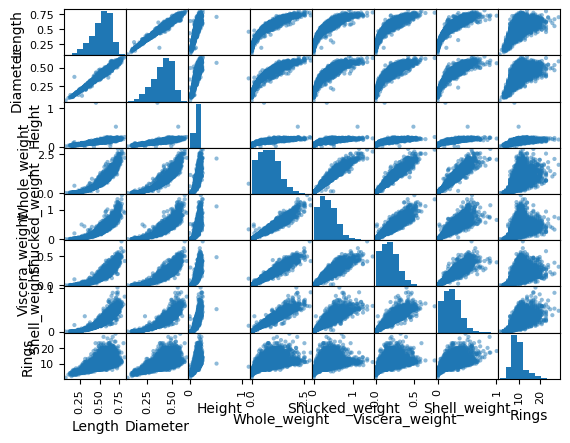

In [21]:
pd.plotting.scatter_matrix(abalone)

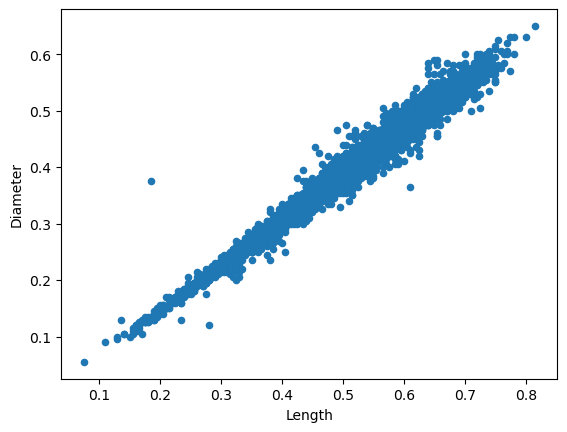

In [22]:
_ = abalone.plot.scatter('Length', "Diameter")

That's close to a straight line, if you know the length, you can look at this chart and predict a small range of diameters, (or vice-versa). There are a few outliers. Let's look at one more.

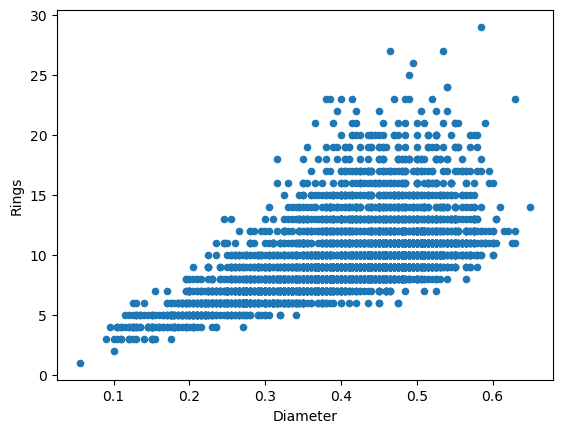

In [23]:
_ = abalone.plot.scatter("Diameter", "Rings") #rings are always whole numbers. 

### Code Example: Representing Multivariate Data and Distributions
Representing multivariate data is easy in any representation based on rows and columns—just add a column for each variable. We already saw examples of that when we talked about linear regression; we just called them columns before splitting them into inputs and outputs. For the moment, we are not concerned with inputs and outputs, so each variable is just another column.

Consider the following data describing ten mangos. Each row in this table corresponds to a single mango.

**Table 2:** Mango Data - Two Variables

In [24]:
data = {
    'yellowness': [1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5],
    'softness': [1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 5]
}
data_df = pd.DataFrame(data)
data_df

,yellowness,softness
0,1,1
1,2,1
2,2,2
3,3,2
4,3,2
5,3,3
6,3,4
7,3,4
8,4,4
9,4,4


We can compact this table by combining rows with the same values and adding a count for the number of combined rows. This is essentially making a histogram but with more than one variable and not using buckets.

In [26]:
import pandas as pd

# Create a dictionary with the data
data = {
    'yellowness': [1, 2, 2, 3, 3, 3, 4, 5],
    'softness': [1, 1, 2, 2, 3, 4, 4, 5],
    'count': [1, 1, 1, 2, 1, 1, 2, 1]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,yellowness,softness,count
0,1,1,1
1,2,1,1
2,2,2,1
3,3,2,2
4,3,3,1
5,3,4,1
6,4,4,2
7,5,5,1


From this table, we can trivially turn the counts into probabilities by dividing the total count (or the original number of rows).

In [27]:
import pandas as pd

# Create a dictionary with the data
data = {
    'yellowness': [1, 2, 2, 3, 3, 3, 4, 5],
    'softness': [1, 1, 2, 2, 3, 4, 4, 5],
    'sample probability': ["1/10 = 0.1", "1/10 = 0.1", "1/10 = 0.1", "2/10 = 0.2", 
                           "1/10 = 0.1", "1/10 = 0.1", "2/10 = 0.2", "1/10 = 0.1"]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,yellowness,softness,sample probability
0,1,1,1/10 = 0.1
1,2,1,1/10 = 0.1
2,2,2,1/10 = 0.1
3,3,2,2/10 = 0.2
4,3,3,1/10 = 0.1
5,3,4,1/10 = 0.1
6,4,4,2/10 = 0.2
7,5,5,1/10 = 0.1


At this point, the table is a concise representation of the sample probability distribution. This table can easily be represented as a list or an array in Python, but depending on your needs, you may prefer a dictionary of probabilities like we've used during the last couple of weeks. But what will the key be?

Previously, we described probability distributions of one variable, so we used the values of that variable as the keys. Now, we are looking at multiple variables, so there are multiple values at once. The simplest way to handle this is to make a tuple of the values. The main thing to remember is to use a consistent order of variables when assembling the tuples. Here is some example code to do so.

In [33]:
def build_multivariate_distribution(input_data):
    counts = {}
    for row in input_data:
        key = tuple(row)
        counts[key] = counts.get(key, 0) + 1
               
    total_count = sum(counts.values())
               
    return {key: count / total_count for key, count in counts.items()}       

## Code Notes 
- The initial string at the beginning of the function is called a doc string.
    - Doc strings are used as built-in documentation.
    - A number of tools can automatically extract doc strings to generate separate documentation. Many module web pages use these to document their functions.
    - The doc string can be accessed programmatically as the `__doc__` attribute. In this case, that would be `build_multivariate_distribution.__doc__`.
- The for loop iterates over each row of data.
    - This is where the "array-like" requirement comes in. The phrasing is from NumPy and in this context means we expect the for loop to repeat for individual rows of data.
    - Each row is converted to a tuple containing the same values to get a key. Converting into a tuple freezes the values so that they cannot be changed. This lets the tuple be used as a key in the dictionary.
- `counts.get(key, 0)` is used to handle cases where the key is not in the dictionary yet.
    - If it is not in the dictionary yet, 0 will be returned as the default value, meaning no matching rows were previously counted.
    - Just using `counts[key]` would raise KeyError exceptions.
    - Alternatively, you could check key in counts, but using `counts.get(key, 0)` makes the overall code simpler.
- `counts.values()` returns a sequence of values in the dictionary.
    - Since this dictionary has row/count pairs, the sequence is of row counts.
    - Summing the row counts gives the total number of input rows.
- The last line is a dictionary comprehension.
    - A dictionary comprehension is like a list comprehension, but it is written surrounded with braces (`{}`) instead of brackets (`[]`) and requires two values of output separated by a colon (`:`).
    - This dictionary comprehension works with the sequence of key/count pairs from the `counts.items()` sequence.

In [34]:
# mango data: two columns: yellowness and softness
mango_data = [[1,1],[2,1],[2,2],[3,2],[3,2],[3,3],[3,4],[4,4],[4,4],[5,5]]
 
# output keys are (yellowness, softness) tuples
mango_distribution = build_multivariate_distribution(mango_data)
mango_distribution

{(1, 1): 0.1,
 (2, 1): 0.1,
 (2, 2): 0.1,
 (3, 2): 0.2,
 (3, 3): 0.1,
 (3, 4): 0.1,
 (4, 4): 0.2,
 (5, 5): 0.1}

### Code Notes 
- `mango_data` has the same data as in the first table above, structured as a list of lists.
- The resulting distribution has tuples of yellowness and softness as keys.
- The function `build_multivariate_distribution` implements one of the ways to turn multiple variables into one variable, by wrapping up the multiple variables into a single tuple.
- We previously said we would avoid this, and we maintain this stance for reasoning about variables.
- When programming, it may be much more convenient to merge them into one, but we emphasize that these tuple keys are still transparent about the original variable values.

### Code Example: Representing Multivariate Distributions With Pandas
- Converting a multicolumn dataset into a probability is even easier if you already have the data in a pandas data frame. The following example code will work through that construction step by step with the abalone dataset.

### Code Notes
- The key pandas that will be used is called groupby, which allows calculations over groups by some specified criteria.
- We will use the entire list of columns as the grouping criteria, so rows will only be grouped together if all the row values match.

In [36]:
abalone.groupby(list(abalone.columns)).size()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  Shell_weight  Rings
F    0.275   0.195     0.070   0.0800        0.0310          0.0215          0.0250        5        1
     0.290   0.210     0.075   0.2750        0.1130          0.0675          0.0350        6        1
             0.225     0.075   0.1400        0.0515          0.0235          0.0400        5        1
     0.305   0.225     0.070   0.1485        0.0585          0.0335          0.0450        7        1
             0.230     0.080   0.1560        0.0675          0.0345          0.0480        7        1
                                                                                                   ..
M    0.770   0.605     0.175   2.0505        0.8005          0.5260          0.3550        11       1
             0.620     0.195   2.5155        1.1155          0.6415          0.6420        12       1
     0.775   0.570     0.220   2.0320        0.7350          0.4755          0.6585    

### Code Notes
- This is a little hard to read, since all the columns are now being used to index, or label, each row.
- We can "push" those back to regular columns with the reset_index method of data frames.

In [37]:
abalone.groupby(list(abalone.columns)).size().reset_index()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,0
0,F,0.275,0.195,0.070,0.0800,0.0310,0.0215,0.0250,5,1
1,F,0.290,0.210,0.075,0.2750,0.1130,0.0675,0.0350,6,1
2,F,0.290,0.225,0.075,0.1400,0.0515,0.0235,0.0400,5,1
3,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.0450,7,1
4,F,0.305,0.230,0.080,0.1560,0.0675,0.0345,0.0480,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,M,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.3550,11,1
4173,M,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,12,1
4174,M,0.775,0.570,0.220,2.0320,0.7350,0.4755,0.6585,17,1
4175,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12,1


### Code Notes
- Now the columns are back to normal, but the new column with the number of matching rows is labeled zero.
- We can rename that before pushing the index columns back.

In [38]:
abalone.groupby(list(abalone.columns)).size().rename("count").reset_index()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,count
0,F,0.275,0.195,0.070,0.0800,0.0310,0.0215,0.0250,5,1
1,F,0.290,0.210,0.075,0.2750,0.1130,0.0675,0.0350,6,1
2,F,0.290,0.225,0.075,0.1400,0.0515,0.0235,0.0400,5,1
3,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.0450,7,1
4,F,0.305,0.230,0.080,0.1560,0.0675,0.0345,0.0480,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,M,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.3550,11,1
4173,M,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,12,1
4174,M,0.775,0.570,0.220,2.0320,0.7350,0.4755,0.6585,17,1
4175,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12,1


### Code Notes
- Now we have all the counts, but since we are looking for a distribution, we really want probabilities.
- The sample probability is just the count divided by the total number of samples, so we can slip that calculation in the middle.

In [39]:
(abalone.groupby(list(abalone.columns)).size() / len(abalone)).rename("probability").reset_index()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,probability
0,F,0.275,0.195,0.070,0.0800,0.0310,0.0215,0.0250,5,0.000239
1,F,0.290,0.210,0.075,0.2750,0.1130,0.0675,0.0350,6,0.000239
2,F,0.290,0.225,0.075,0.1400,0.0515,0.0235,0.0400,5,0.000239
3,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.0450,7,0.000239
4,F,0.305,0.230,0.080,0.1560,0.0675,0.0345,0.0480,7,0.000239
...,...,...,...,...,...,...,...,...,...,...
4172,M,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.3550,11,0.000239
4173,M,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,12,0.000239
4174,M,0.775,0.570,0.220,2.0320,0.7350,0.4755,0.6585,17,0.000239
4175,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12,0.000239


Did you notice that the number of rows in this distribution is the same number as the original data set? That means none of the original rows matched. Building a distribution directly from the raw data is not always more useful or informative than the raw data. In the next lesson about marginal distributions, we will consider subsets of columns, and depending on the subset, may see more redundancy to shrink the distribution.

## Lesson 6.2: Marginal Distributions
A marginal distribution is a distribution representing a subset of the variables of a multivariate distribution. You can think of the marginal distribution as the distribution ignoring some variables or pretending that they do not exist.

### Definitions: Marginal Distribution
Given a multivariate distribution, the marginal distribution for a subset of values $X_1,\dots$ is the distribution only including those variables and not considering the presence of other variables.

If we are calculating the distribution from raw rows, we ignore or drop the columns that are not in the target subset of variables. If we are calculating the distribution from probabilities, we calculate for each combination of the target variables, summing up the probabilities over each combination of the other variables.

### Why Are These Distributions Called Marginal?
The name marginal distribution apparently comes from summarizing a bivariate distribution written as a table. In this table, each row represents an assignment or a range of values of the first variable, and each column represents an assignment or a range of values of the second variable. Summary rows and columns can be added on the margins of the table, summing up the columns and rows, respectively.

Consider the following example table. Each row represents a particular value of $x$, and each column represents a particular value of $y$.

In [40]:
data = {
    'y=1' : [0.20, 0.10, 0.05],
    'y=2' : [0.10, 0.10, 0.10],
    'y=3' : [0.10, 0.10, 0.10]
}

index_labels = ['x=1', 'x=2', 'x=3']
df = pd.DataFrame(data, index=index_labels)
df

,y=1,y=2,y=3
x=1,0.20,0.1,0.1
x=2,0.10,0.1,0.1
x=3,0.05,0.1,0.1


The next table summarizes the first variable, 𝑥 , which is represented by rows, by adding a marginal column summing up each row at the right edge (margin) of the table. The values in the marginal column have the total probability for the respective 𝑥 values. The whole column represents the marginal distribution of 𝑥 .

In [41]:
data = {
    'y=1' : [0.20, 0.10, 0.05],
    'y=2' : [0.10, 0.10, 0.10],
    'y=3' : [0.10, 0.10, 0.10],
    'X marginal' : [0.40, 0.30, 0.30]
}

index_labels = ['x=1', 'x=2', 'x=3']
df = pd.DataFrame(data, index=index_labels)
df

,y=1,y=2,y=3,X marginal
x=1,0.20,0.1,0.1,0.4
x=2,0.10,0.1,0.1,0.3
x=3,0.05,0.1,0.1,0.3


The next table summarizes the second variable, $y$, which is represented by columns, by adding a marginal row summing up each column at the bottom edge (margin) of the table. The values in the marginal row have the total probability for the respective $y$ values. The whole row represents the marginal distribution of $y$.

In [42]:
data = {
    'y=1' : [0.20, 0.10, 0.05, 0.35],
    'y=2' : [0.10, 0.10, 0.10, 0.30],
    'y=3' : [0.10, 0.10, 0.10, 0.35]
}

index_labels = ['x=1', 'x=2', 'x=3', 'Y Marginal']
df = pd.DataFrame(data, index=index_labels)
df

,y=1,y=2,y=3
x=1,0.20,0.1,0.10
x=2,0.10,0.1,0.10
x=3,0.05,0.1,0.10
Y Marginal,0.35,0.3,0.35


The final table summarizes both variables by adding both the marginal row and columns and confirms that both marginal distributions sum to probability 1.

In [43]:
data = {
    'y=1' : [0.20, 0.10, 0.05, 0.35],
    'y=2' : [0.10, 0.10, 0.10, 0.30],
    'y=3' : [0.10, 0.10, 0.15, 0.35],
    'X marginal' : [0.40, 0.30, 0.30, 1.00]
}

index_labels = ['x=1', 'x=2', 'x=3', 'Y Marginal']
df = pd.DataFrame(data, index=index_labels)
df

,y=1,y=2,y=3,X marginal
x=1,0.20,0.1,0.10,0.4
x=2,0.10,0.1,0.10,0.3
x=3,0.05,0.1,0.15,0.3
Y Marginal,0.35,0.3,0.35,1.0


## Code Example: Computing Marginal Distributions in Python

In [46]:
def build_marginal_from_rows(input_data, selected_variables):
    counts = {}
    for input_row in input_data:
        output_key = tuple(input_row[i] for i in selected_variables)
        counts[output_key] = counts.get(output_key, 0) + 1
             
    total_count = sum(counts.values())
             
    return {key: count / total_count for key, count in counts.items()}

### Code Notes
- This new function `build_marginal_from_rows` is pretty similar to `build_multivariate_distribution earlier`, but it adds a new argument, `selected_variables`, and changes the `key` setup for the output.
- `selected_variables` is a sequence of column indexes into the input data to allow easy construction of `output_key`.

In [47]:
build_marginal_from_rows(mango_data, [0])

{(1,): 0.1, (2,): 0.2, (3,): 0.4, (4,): 0.2, (5,): 0.1}

### Code Notes
This call to `build_marginal_from_rows` selected column zero, yellowness, so the resulting dictionary is populated with sample probabilities for the yellowness values.

In [48]:
def build_marginal_from_distribution(input_distribution, selected_variables):
    output = {}
    for (input_key, input_probability) in input_distribution.items():
        output_key = tuple(input_key[i] for i in selected_variables)
        output[output_key] = output.get(output_key, 0.0) + input_probability
         
    return output

### Code Notes 
- This new function `build_marginal_from_distribution` takes in the same `selected_variables` argument and a previously computed dictionary of probabilities.
- The column indices in selected_variables must be relative to the key order of the input distribution. There is no tracking of the original file columns or order.
- Instead of aggregating counts and then dividing for probabilities, this function sums up probabilities since those input distributions make them directly available.

In [49]:
build_marginal_from_distribution(mango_distribution, [0])

{(1,): 0.1, (2,): 0.2, (3,): 0.4, (4,): 0.2, (5,): 0.1}

### Code Notes 
- This call to `build_marginal_from_distribution` computes the same dictionary as the call to `build_marginal_from_rows` but uses the previously computed distribution of all the mango data instead of the original rows.

### Code Example: Computing Marginal Distribution in Pandas

If you already have your data in a pandas DataFrame, computing a marginal distribution is similar to computing the multivariate distributions before. As with the pure Python example above, the details vary based on whether you are starting from raw data rows or a probability distribution.

For your reference, here is the previous code for computing the multivariate distribution.

In [50]:
(abalone.groupby(list(abalone.columns)).size() /
len(abalone)).rename("probability").reset_index()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,probability
0,F,0.275,0.195,0.070,0.0800,0.0310,0.0215,0.0250,5,0.000239
1,F,0.290,0.210,0.075,0.2750,0.1130,0.0675,0.0350,6,0.000239
2,F,0.290,0.225,0.075,0.1400,0.0515,0.0235,0.0400,5,0.000239
3,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.0450,7,0.000239
4,F,0.305,0.230,0.080,0.1560,0.0675,0.0345,0.0480,7,0.000239
...,...,...,...,...,...,...,...,...,...,...
4172,M,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.3550,11,0.000239
4173,M,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,12,0.000239
4174,M,0.775,0.570,0.220,2.0320,0.7350,0.4755,0.6585,17,0.000239
4175,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12,0.000239


### Code Notes:
- All that needs to change here is which columns are grouped on.

In [51]:
(abalone.groupby(["Length", "Diameter"]).size() / len(abalone)).rename("probability").reset_index()

,Length,Diameter,probability
0,0.075,0.055,0.000239
1,0.110,0.090,0.000239
2,0.130,0.095,0.000239
3,0.130,0.100,0.000239
4,0.135,0.130,0.000239
...,...,...,...
1175,0.775,0.630,0.000239
1176,0.780,0.600,0.000239
1177,0.780,0.630,0.000239
1178,0.800,0.630,0.000239


If you already have a pandas data frame of probabilities, the calculation is even easier.

In [52]:
abalone_length_diameter_probabilities = (abalone.groupby(["Length", "Diameter"]).size() / len(abalone)).rename("probability").reset_index()

In [55]:
abalone_length_diameter_probabilities.groupby("Length")["probability"].sum().reset_index()

,Length,probability
0,0.075,0.000239
1,0.110,0.000239
2,0.130,0.000479
3,0.135,0.000239
4,0.140,0.000479
...,...,...
129,0.770,0.000718
130,0.775,0.000479
131,0.780,0.000479
132,0.800,0.000239


### Code Notes:
- This calculation is just grouping on the new columns and summing the probabilities.
- The probability column is selected by indexing after the groupby. This drops any extra columns that are not being marginalized, such as the diameter in this example.
- As before, the `reset_index` method is used to keep length as a column instead of the index.
    - Don't worry about the index for now.
    - You will learn when and how to use it in module 2.

### Visualizing Marginal Distributions of One Variable
Here is a visualization of marginalized distributions as a sum of finer-grained distributions. The mango data above is used to show the marginal distribution by yellowness, broken up by the softness variable in the original data.

Note that the sum of probabilities is unchanged.

In [56]:
import matplotlib.pyplot as plt
import numpy as np

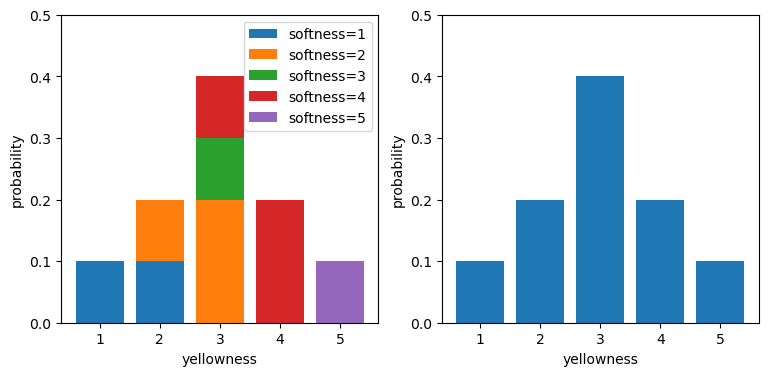

In [76]:
plt.figure(figsize=(9, 4))  # Create a new figure with a size of 9x4 inches

plt.subplot(1, 2, 1)  # Create the first subplot in a 1x2 grid (left side)

# Sort and get unique 'yellowness' values from 'mango_data'
yellowness_values = sorted(set(r[0] for r in mango_data)) 

# Sort and get unique 'softness' values from 'mango_data'
softness_values = sorted(set(r[1] for r in mango_data)) 

# Initialize an array of zeros (for cumulative probabilities) with the same length as 'yellowness_values'
cumulative_probabilities = np.asarray([0.00 for _ in yellowness_values])

# Set the y-axis limits for the current plot (probability range between 0 and 0.5)
plt.gca().set_ylim((0, 0.5))

# Loop through all unique softness values to plot each 'softness' level
for s in softness_values:
    # Get the probabilities for the current softness level for each yellowness value
    current_probabilities = [mango_distribution.get((y, s), 0.0) for y in yellowness_values]
    
    # Plot the bar chart for the current softness level
    plt.bar(yellowness_values,               # X-axis: yellowness values
            current_probabilities,           # Heights of bars (current probabilities)
            label=f"softness={s}",           # Label for the legend (softness level)
            bottom=cumulative_probabilities) # Stack the current bars on top of cumulative values
    
    # Update the cumulative probabilities to include the current softness level's probabilities
    cumulative_probabilities += current_probabilities

# Set the label for the x-axis (yellowness)
plt.xlabel('yellowness')

# Set the label for the y-axis (probability)
plt.ylabel('probability')

# Add the legend to differentiate the softness levels in the stacked bar chart
plt.legend()

# Create the second subplot in a 1x2 grid (right side)
plt.subplot(1, 2, 2)

# Set the y-axis limits for the current plot (probability range between 0 and 0.5)
plt.gca().set_ylim((0, 0.5))

# Compute the marginal distribution of 'yellowness' from 'mango_distribution'
yellowness_distribution = build_marginal_from_distribution(mango_distribution, [0])

# Plot the bar chart for the marginal distribution of 'yellowness'
plt.bar(yellowness_values,                  # X-axis: yellowness values
        [yellowness_distribution[(y,)] for y in yellowness_values])  # Heights of bars (probabilities)

# Set the label for the x-axis (yellowness)
plt.xlabel("yellowness")

# Set the label for the y-axis (probability)
plt.ylabel("probability")

# End of the plotting, nothing is returned
None

### Chart Notes 
- The total shapes of the histograms are the same.
    - The left histogram shows the breakdown by yellowness and softness, matching the original data.
    - The right histogram removes the breakdowns on softness, just showing the marginal distribution of yellowness.
- Marginalizing this distribution essentially removes the distinctions between softness values in the left histogram.

### Code Notes 
- The Matplotlib function `matplotlib.pyplot.figure`, referenced as `plt.figure`, creates the figure.
    - The optional `figsize` arguments sets the figure size and takes in a tuple of width and height in inches.
    - The figure function does not need to be called explicitly unless you want to override some of the figure settings.
- The Matplotlib function `matplotlib.pyplot.subplot`, referenced as `plt.subplot`, specifies that the figure will be divided into multiple plots and selects one.
    - The arguments passed here are the number of rows, number of columns, and index of the subplot. The subplot index is 1-based, so the first subplot has index 1. Most Python data structures are 0-based, but Matlab, whose plot function inspired Matplotlib, is 1-based.
- The Matplotlib function `matplotlib.pyplot.gca`, referenced as `plt.gca`, returns an axis object.
    - In this code, the axis object's `set_ylim` method is used to set the range of y values. The automatic range code was picking `0.40` and `~0.42`, which adds distracting differences when comparing them.
    - The same visualization can be used for marginal distributions of multiple variables (or a single non-numeric variable) if you use a non-numeric x-axis. However, this will be hard to interpret if you have too many distinct variable combinations.

### Section 6.3: Sum Rule, Product Rule, and Bayes' Theorem

1. **Sum Rule**: 
   The sum rule helps calculate marginal probabilities. If you have a joint probability distribution over two variables (say \(X\) and \(Y\)), the sum rule allows you to sum over all possible values of one variable (e.g., \(Y\)) to get the marginal probability of the other (\(X\)). This is useful when you want to focus on one part of the probability distribution.

   $$ p(X) = \sum_Y p(X, Y) $$

2. **Product Rule**: 
   The product rule shows how to break down a joint probability into two components: a conditional probability and a marginal probability. Specifically, it tells you that the joint probability of \(X\) and \(Y\) happening can be split into the probability of \(X\) happening given \(Y\) (i.e., \( p(X|Y) \)) multiplied by the probability of \(Y\) happening (i.e., \( p(Y) \)).

   $$ p(X, Y) = p(X | Y) \cdot p(Y) $$

3. **Bayes' Theorem**: 
   Bayes' theorem is derived from the product rule and helps you reverse conditional probabilities. If you know the probability of observing some data given a hypothesis (called the likelihood), you can update your belief about the hypothesis after seeing the data (called the posterior).

   $$ p(X | Y) = \frac{p(Y | X) \cdot p(X)}{p(Y)} $$

**Key takeaway**: These rules form the building blocks of probability and help you reason about uncertainty in logical ways.

## 6.3 Lesson: Conditional Distributions
Conditional distributions answer the question: What does a distribution look like when restricted to cases where some other condition is true? For example, what is the distribution of maximum temperatures on days when it snowed?

### Definition: Conjunction (Logical And)

The conjunction of Boolean random variables \( A \) and \( B \) is denoted $A \cap B$ and is true if and only if both $A$ and $B$ are true.

In some texts, you will see this written as $A \land B$ instead. The notation $A \land B$ is from Boolean expressions, while $A \cap B$ is from set theory and refers to the intersection of the events where $A$ and $B$ are true.

### Definition: Conditional Probability

The conditional probability of Boolean random variable $A$ being true, assuming another Boolean random variable $B$ is already known to be true, is

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

In English, this means that the conditional probability of $A$ given $B$ is the probability both are true divided by the probability that $B$ is true.

When we talk about conditional distributions, the conditional probability formula is applied to each value.

$$
P(X=x|B) = \frac{P((X=x) \cap B)}{P(B)}
$$

### Code Example: Computing Conditional Distributions in Python

In [78]:
def build_conditional_from_distribution(input_distribution, condition_func):
    # Filter the input_distribution to retain only those elements that satisfy the condition_func
    temp = {k: p for k, p in input_distribution.items() if condition_func(k)}
    
    # Sum the probabilities of the filtered items to get the total probability of the condition being true
    condition_probability = sum(temp.values())
     
    # Normalize the probabilities in the filtered distribution by dividing each by the total condition_probability
    return {k: p / condition_probability for k, p in temp.items()}

### Code Notes 
- `build_conditional_from_distribution` works as follows.
    - First filter the key/value pairs from the input distribution according to the condition.
    - Calculate the probability of the condition ( 𝑃(𝐵) ) by summing up the surviving probabilities.
    - Divide all the probabilities so that they sum up to one again (the division by 𝑃(𝐵) in the formulas above).
- `build_conditional_from_distribution` does not change the keys, so conditioning for a variable having a particular value still shows that variable present but fixed to that value. If this is inconvenient, `build_marginal_from_distribution` can be used to drop the conditioned variable.

In [79]:
build_conditional_from_distribution(mango_distribution, lambda r: r[0]==3)

{(3, 2): 0.5, (3, 3): 0.25, (3, 4): 0.25}

### Code Example: Visualizing Conditional Distributions of one Variable
The following code generates charts showing how the conditioning removes possible variable combinations, and then they are rescaled into a new probability distribution. Take a look at the charts first—understanding how the distribution changes are more important than the code.

Text(0, 0.5, 'probability')

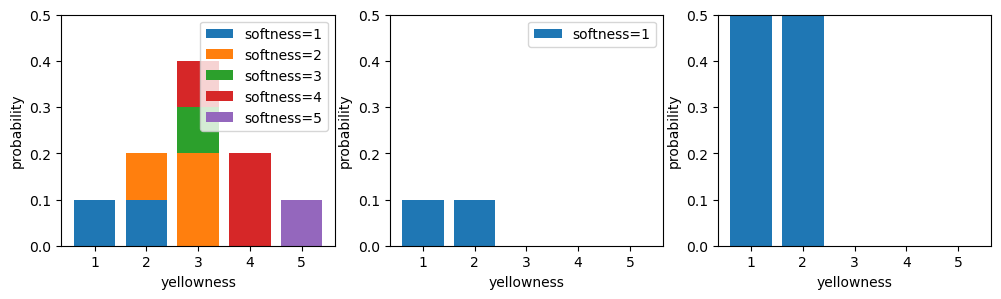

In [81]:
plt.figure(figsize=(12, 3))
 
plt.subplot(1, 3, 1)
 
yellowness_values = sorted(set(r[0] for r in mango_data))
softness_values = sorted(set(r[1] for r in mango_data))
cumulative_probabilities = np.asarray([0.0 for _ in yellowness_values])
 
plt.gca().set_ylim((0, 0.5))
for s in softness_values:
    current_probabilities = [mango_distribution.get((y, s), 0.0) for y in yellowness_values]
    plt.bar(yellowness_values,
            current_probabilities,
            label=f"softness={s}",
            bottom=cumulative_probabilities)
                     
    cumulative_probabilities += current_probabilities
plt.xlabel("yellowness")
plt.ylabel("probability")
plt.legend()
                           
plt.subplot(1, 3, 2)
                           
plt.gca().set_ylim((0, 0.5))
for s in [1]:
    current_probabilities = [mango_distribution.get((y, s), 0.0) for y in yellowness_values]
    plt.bar(yellowness_values,
           current_probabilities,
           label=f"softness={s}")
                           
plt.xlabel("yellowness")
plt.ylabel("probability")
plt.legend()
                           
plt.subplot(1, 3, 3)
                           
plt.gca().set_ylim((0, 0.5))
yellowness_distribution = build_conditional_from_distribution(mango_distribution, lambda r: r[1] == 1)
plt.bar(yellowness_values, [yellowness_distribution.get((y, 1), 0) for y in yellowness_values])
plt.xlabel("yellowness")
plt.ylabel("probability")             

### Chart Notes 
- The left chart is a repeat from looking at marginal distributions of the same data, showing the histograms by yellowness with the bars also broken up by softness.
- The middle chart is conditioned (filtered) to only show `softness=1` still using the probabilities of the original distribution.
- The right chart shows the distribution rescaled by dividing by the condition probability, so the probabilities add up to one correctly.

### Quickly Visualizing Conditional Distributions with Pandas
This video shows how to quickly visualize conditional distributions with pandas using examples from the abalone data set.
- focus on visualizations
- skip probabilities
- use pandas visualization directly

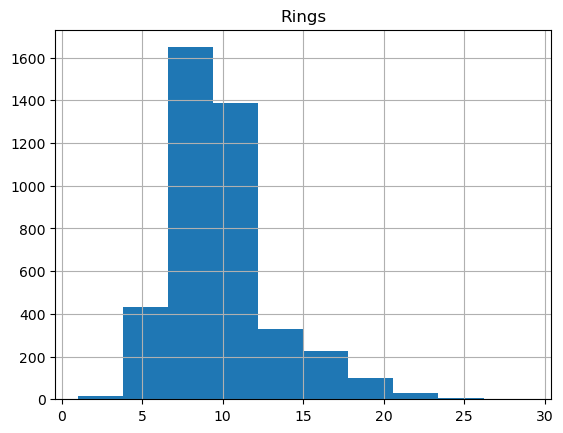

In [82]:
_ = abalone.hist("Rings") #get a histgram for the df using the 'hist' method

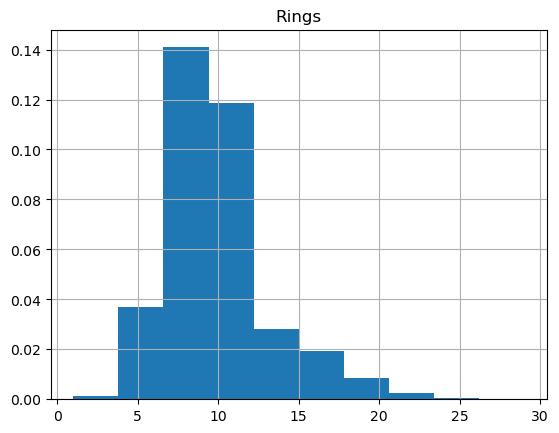

In [85]:
_ = abalone.hist('Rings', density=True)

^ the `hist` method does have a density function, which might look like a probability, but this is actually a probability density function. In particular, if you plot a histogram for a column with a small range of width less than 1, you will see probability densities more than one, so they definitely are not probabilities. 

Let's make one more tweak to the chart

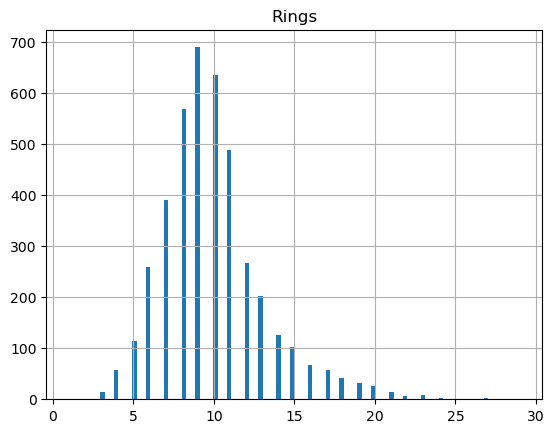

In [87]:
_ = abalone.hist("Rings", bins=100) # alot higher than the max number of rings

We just want to be able to look at a bar and know how many rings it corresponds to. Later histograms will be compared to this chart. Note that the mode here is 9 rings, but 8 and 10 rings are almost as common. Let's try conditioning the dataset. 

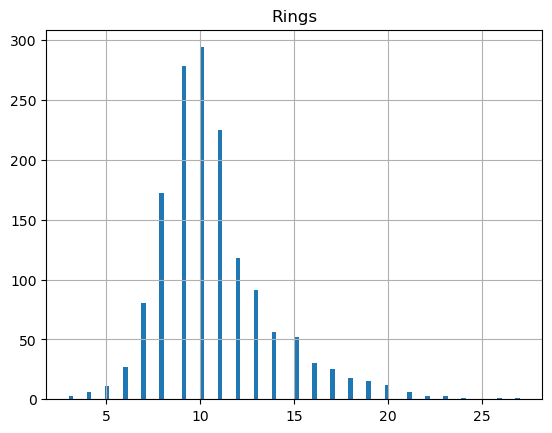

In [88]:
_ = abalone.query("Sex == 'M'").hist("Rings", bins=100) #Male

That query method on pandas dataframes is very handy for conditioning or filtering data. You can write a pythonic expression that can access all the dataframe columns as if they were variables.

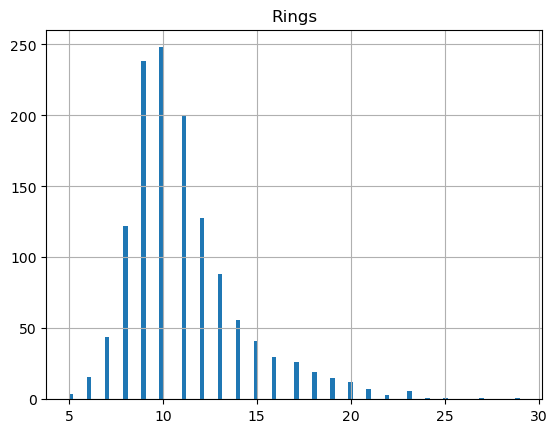

In [89]:
_ = abalone.query("Sex == 'F'").hist("Rings", bins=100) #Female

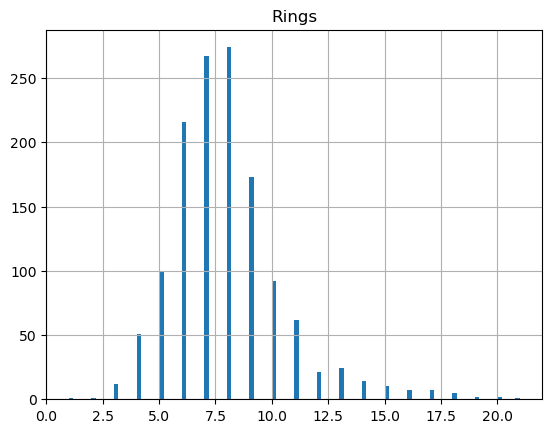

In [90]:
_ = abalone.query("Sex == 'I'").hist("Rings", bins=100) #Female

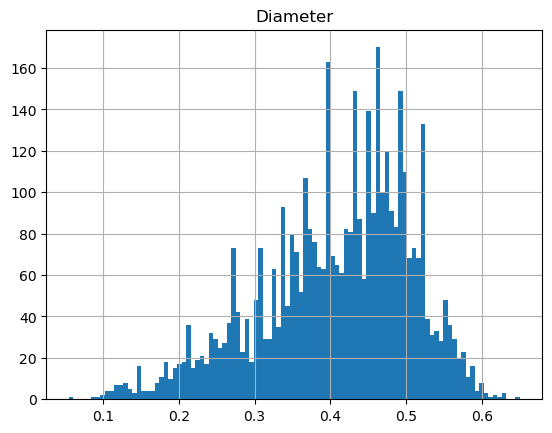

In [91]:
_ = abalone.hist("Diameter", bins = 100)

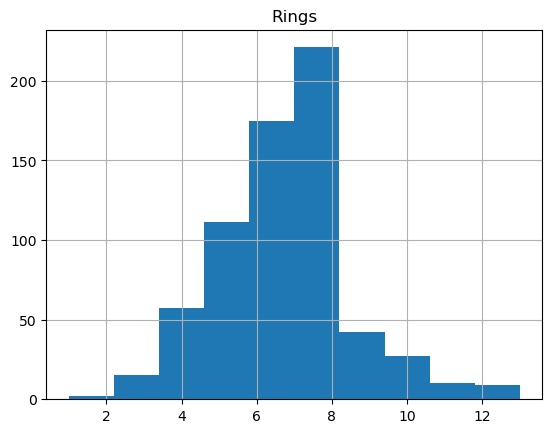

In [92]:
_ = abalone.query("Diameter <= 0.3").hist("Rings")

This query shifted the distribution to the left, but not nearly as much as I expected.

## 6.4 Lesson: Bayes' Theorem
Bayes' Theorem gives an alternate calculation for conditional probabilities that is more convenient in some circumstances. Most notably, it is the basis of Bayesian inference.

### Statement of Bayes’ Theorem
Bayes' Theorem is simply stated as follows.

### Theorem:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Compared to the original definition for conditional probabilities,

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

Bayes' Theorem substitutes

$$
P(A \cap B) = P(B|A) \cdot P(A)
$$

That equality can be derived from the definition for $P(B|A)$:

$$
P(B|A) = \frac{P(B \cap A)}{P(A)}
$$

Multiplying both sides by $P(A)$:

$$
P(B|A) \cdot P(A) = P(B \cap A)
$$

or equivalently:

$$
P(B|A) \cdot P(A) = P(A \cap B)
$$

(The last substitution is allowed because ∧ is commutative, so the order does not matter.)

Thus, Bayes' Theorem follows from the original formula for conditional probabilities.

### Conditional Probability Density Functions

Probability density functions are another example where it is more convenient to update conditional probabilities using Bayes' Theorem than the original definition.

For a random variable $X$ with probability density function $f_X$, then the conditional probability density function of $X$ given $Y$ is

$$
f_{X|Y}(x) = \frac{P(Y|X=x)}{P(Y)} \cdot f_X(x)
$$

### When Is Bayes’ Theorem Useful?

Bayes' Theorem is useful in practice in two ways. First, it allows rewrites of formulas that may facilitate simplifications or otherwise help algebraic manipulation. Rewrites for algebraic manipulation will be very situational. Second, it changes the actual statistics that are calculated or estimated in ways that may be convenient.

This trade-off revolves around calculating or estimating $P(A \cap B)$ vs. calculating or estimating $P(B|A)$ and $P(A)$. What if $P(A \cap B)$ is low and we have very little data to estimate it? Can we somehow estimate $P(B|A)$ more reliably? What if we have a model to predict $P(B|A)$? This may actually be feasible if we have a lot of data for $A$ and some way to relate $B$ to other data that we have.

To make this more concrete, consider $A$ as the variable where a visit to our shopping website has a sale, and $B$ as the variable where a purple flamingo is added to the shopping cart. We may not have a lot of data about purchases of purple flamingos, but we might know more about flamingos in general as well as the distribution of colors in purchases and be able to combine those. So we might be able to model the conditional probability effectively. This use case is still situational; it depends on what the available data and models are.

In [106]:
data = {
    'x' : [1, 2, 2, 3],
    'y' : [3, 1, 4, 3],
    'z' : [.25, 3, 1, 3],
}

df = pd.DataFrame(data)
df

,x,y,z
0,1,3,0.25
1,2,1,3.00
2,2,4,1.00
3,3,3,3.00


In [109]:
x_counts = df['x'].value_counts(normalize=True)
df['P(x)'] = df['x'].map(x_counts)
df

,x,y,z,P(x)
0,1,3,0.25,0.25
1,2,1,3.00,0.50
2,2,4,1.00,0.50
3,3,3,3.00,0.25


In [111]:
#calculate the probability of P(X=3|Z=3)
z3 = df[df['z'] ==3]
pz3gx3 = (z3['x'] == 3).mean()
pz3gx3

0.5

In [113]:
(.4 * .1) / .8

0.05000000000000001

## Topic Overview: Independence and Correlation
We will now cover a critical concept of data science, dependencies between variables. Dependencies between variables are a necessary condition for making interesting predictions; without dependencies, we can only predict the marginal distribution, and all predictions will be the same. We will learn how to check whether variables are dependent or independent, and if they are dependent, we will explore that dependency via correlations.

### Learning Objectives
- Explain what it means for two or more variables to be independent
- Judge whether two variables are likely independent by reviewing a scatter plot
- Describe typical chaining of dependent variables, and recognize unintuitive independence relationships
- State the mathematical definition of correlations and covariances and explain them colloquially
- Compute correlations and covariances with pure Python and NumPy
- Explain the connections between correlations and linear regression
### Think About It
- How connected are random variables in your life? If something goes wrong, what else do you expect to go wrong?
### Independent Random Variables

The notion of dependence or independence between variables is a simple question. If you know the value of one variable, does that change your expectations of the distributions of the others?

### Independent Random Variables

The notion of dependence or independence between variables is a simple question. If you know the value of one variable, does that change your expectations of the distributions of the others?

### Definitions

#### Definition: Independent Boolean Random Variables

Boolean random variables $A$ and $B$ are independent if and only if

$$
P(A \cap B) = P(A) P(B)
$$

From this definition, you can easily derive that $A$ and $B$ being independent implies $P(A|B) = P(A)$

$$
P(A|B) = \frac{P(A \cap B)}{P(B)} 
$$
$$
= \frac{P(A) P(B)}{P(B)}
$$
$$
= P(A)
$$

Similarly, $P(B|A) = P(B)$ if they are independent.

Why define independence in terms of $P(A \cap B)$ instead of $P(A|B)$? The definition in terms of $P(A \cap B)$ avoids divide by zero questions if either $P(A)$ or $P(B)$ turns out to be zero.

We can generalize this definition to non-Boolean random variables as follows.

#### Definition: Independent Random Variables

Random variables $X$ and $Y$ are independent if and only if for all values $x$ and $y$ of those variables respectively,

$$
P((X = x) \cap (Y = y)) = P(X = x) P(Y = y)
$$

#### Definition: Dependent Random Variables

Two random variables are dependent if and only if they are not independent.

### Code Example: Plotting Independent Random Variables

The following charts give examples of pairs of independent random variables plotted together. Take the time to read the plot function calls to see the distributions being plotted, and note that the Python expressions for the $x$ and $y$ values do not refer to each other in these examples. That's a decisive clue that these variables are independent if you can get the code or formulas for the random variables.

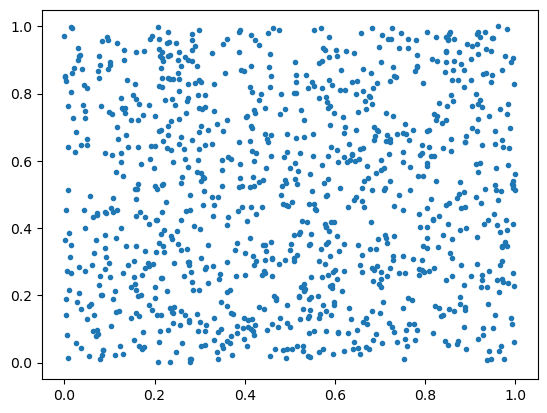

In [115]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
 
samples=1000
 
plt.plot(np.random.random(size=samples), np.random.random(size=samples), ".")

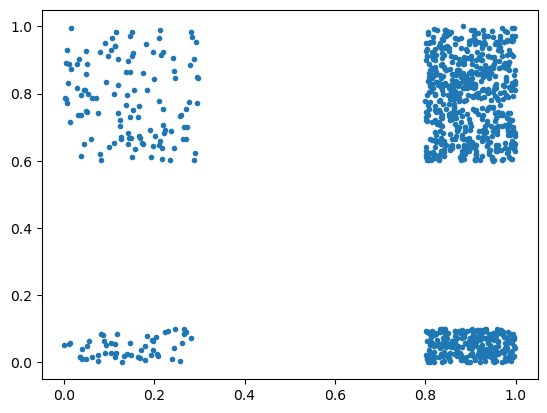

In [116]:
import random
import matplotlib.pyplot as plt

# Function to sample values for 'x' based on a split probability
def x_sample_split():
    # Generate a random number between 0 and 1, if it's less than 0.2:
    if random.random() < 0.2:
        # Return a random value between 0 and 0.3
        return random.random() * 0.3
    else:
        # If the random number is greater than or equal to 0.2, return a random value between 0.8 and 1.0
        return random.random() * 0.2 + 0.8

# Function to sample values for 'y' based on a different split probability
def y_sample_split():
    # Generate a random number between 0 and 1, if it's less than 0.3:
    if random.random() < 0.3:
        # Return a random value between 0 and 0.1
        return random.random() * 0.1
    else:
        # If the random number is greater than or equal to 0.3, return a random value between 0.6 and 1.0
        return random.random() * 0.4 + 0.6

# Define the number of samples to generate for plotting
samples = 1000

# Generate 'samples' number of (x, y) coordinates using the two sampling functions
plt.plot(
    [x_sample_split() for _ in range(samples)],  # Generate 'x' values using the x_sample_split function
    [y_sample_split() for _ in range(samples)],  # Generate 'y' values using the y_sample_split function
    "."  # Plot the points as small dots
)

# Display the plot
plt.show()

### Chart Notes 

- This chart picks $X$ and $Y$ values from two different ranges for each and uniformly at random from each range.
- This gives the impression of sampling from four different rectangles, but there are clearly different densities of samples in each rectangle.
- Do these different sample densities imply dependence? No. As soon as these distributions are conditioned on either an $X$ or $Y$ value, the conditional probability of the other variable will be the same.
- In fact, the conditional probabilities of this chart are always the output distributions of the two functions `x_sample_split` and `y_sample_split`.
- This example is easy to confirm since we know the ground truth of how these samples were generated and can see in the code that they were generated independently without reference to the other variable or any other variable.

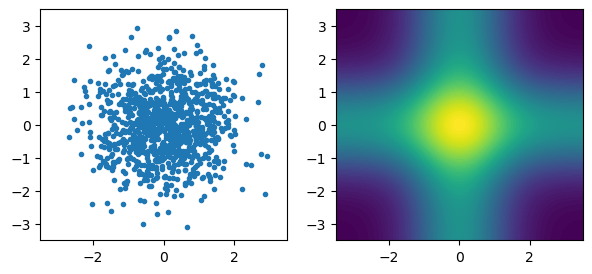

In [118]:
from scipy.stats import norm  # Import the normal distribution (Gaussian) function from scipy.stats
import numpy as np  # Import numpy for array and mathematical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Define the range of the x and y axes
x_min = -3.5
x_max = 3.5
y_min = -3.5
y_max = 3.5

# Create a new figure with a size of 7x3 inches
plt.figure(figsize=(7, 3))

# First subplot: Scatter plot of normally distributed points
plt.subplot(1, 2, 1)  # Create the first subplot in a 1x2 grid (left side)
axis = plt.gca()  # Get the current axis
axis.set_xlim((x_min, x_max))  # Set the limits for the x-axis to range from -3.5 to 3.5
axis.set_ylim((y_min, y_max))  # Set the limits for the y-axis to range from -3.5 to 3.5

# Generate 'samples' number of x and y coordinates, normally distributed, and plot them as dots
plt.plot(np.random.normal(size=samples),  # Generate 'samples' x-values using a standard normal distribution
         np.random.normal(size=samples),  # Generate 'samples' y-values using a standard normal distribution
         ".")  # Plot the points as small dots

# Second subplot: Contour plot of the sum of two normal distributions
plt.subplot(1, 2, 2)  # Create the second subplot in a 1x2 grid (right side)

# Create 1000 equally spaced values between x_min and x_max for the x-axis
xs = np.linspace(x_min, x_max, 1000)

# Create 1000 equally spaced values between y_min and y_max for the y-axis
ys = np.linspace(y_min, y_max, 1000)

# Calculate the sum of probability density functions (PDFs) of two normal distributions over xs and ys
# 'norm.pdf(xs)' generates the PDF for the x-values, 'ys.reshape(len(ys), 1)' reshapes ys for broadcasting
zs = norm.pdf(xs) + norm.pdf(ys.reshape(len(ys), 1))

# Plot filled contour levels for the combined normal distributions
plt.contourf(xs, ys, zs, levels=100)  # Generate a contour plot with 100 levels of filled color
plt.show()

### Chart Notes 
- The chart to the left shows samples of a multivariate normal distribution produced by making both $X$ and $Y$ be normal distributions.
- In general, multivariate normal distributions allow correlations between dimensions, but $X$ and $Y$ were generated independently in this case.
- The lower $X$ density away from $X=0$ reduces the number of samples near the left and right edges of the chart. This appears to shrink the range of $Y$, but this is a predictable effect of having few samples, not an actual dependency between variables.
- To reinforce this point, the graph on the right shows the probability densities, so you can see the probability density is slowly declining, not getting cut off.
- This example will be repeated below as an example of how dependencies between variables do not always chain together intuitively.

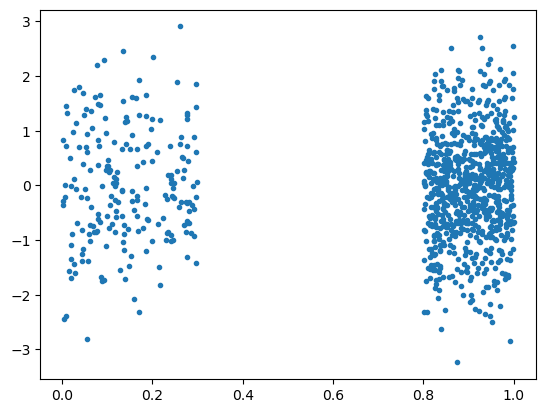

In [120]:
plt.plot([x_sample_split() for _ in range(samples)], np.random.normal(size=samples), ".")
plt.show()

### Code Example: Plotting Dependent Random Variables
Here are some example charts plotting random variables ﻿X﻿ and ﻿Y﻿ that are dependent. In contrast to the examples plotting independent random variables, you can see these variables connected to each other in the code.

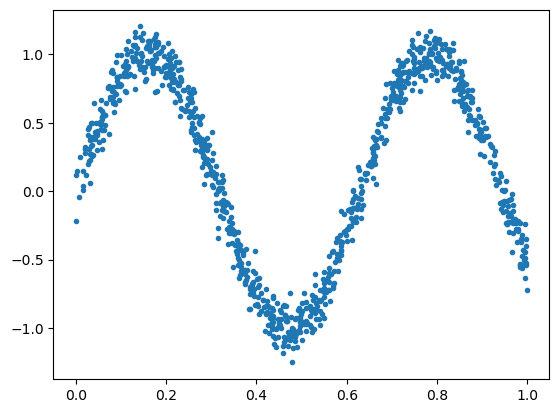

In [122]:
x_samples_uniform = np.random.random(size=samples)
plt.plot(x_samples_uniform, np.sin(x_samples_uniform * 10) + np.random.normal(scale=0.1, size=samples), ".")

### Chart Notes 
In this chart, the $Y$ value is a function of $X$ plus some noise. The magnitude of the noise is much smaller, so it is easy to see that the distribution of $Y$ changes significantly based on the $X$ value.

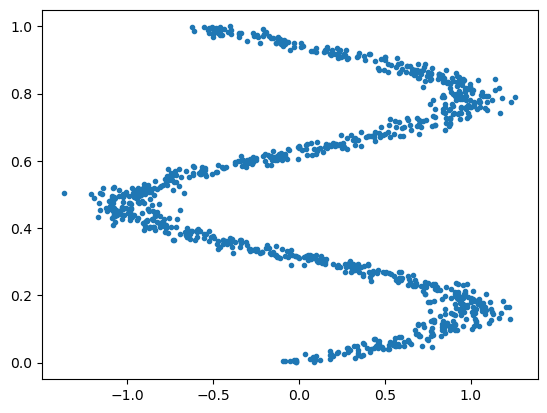

In [123]:
y_samples_uniform = np.random.random(size=samples)
plt.plot(np.sin(y_samples_uniform * 10) + np.random.normal(scale=0.1, size=samples), y_samples_uniform, ".")

### Chart Notes 
This chart is similar to the previous one, but swapping $X$ and $Y$. Given the value of $Y$, the distribution of $X$ is concentrated around in a small range determined by the $Y$ value.

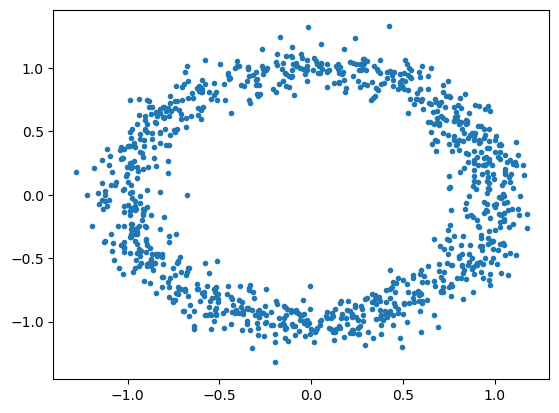

In [126]:
theta_samples_uniform = np.random.uniform(0, 2 * math.pi, size=samples)
plt.plot(np.cos(theta_samples_uniform) + 0.1 * np.random.normal(size=samples),
         np.sin(theta_samples_uniform) + 0.1 * np.random.normal(size=samples), ".")

### Chart Notes 
- The last chart shows $X$ and $Y$ derived from another variable $\theta$. Being derived from a common variable is not sufficient to prove dependence, but in practice, this means that it is likely.
- In this case, compare the middle region around $X$ equals $0$ to the edges around $X=-1$ or $X=1$. The distributions of $Y$ are quite different between those areas.

### Code Example: Chained Dependencies and Potential Fallacies
If $X$ and $Y$ are dependent, and $Y$ and $Z$ are dependent, are $X$ and $Z$ dependent too? More generally, are dependencies between variables transitive? So for any length chain of dependencies does this mean that all pairs of variables in the chain are dependent? 

##### In general, this is false; dependencies are not transitive. We will walk through a few examples now.

The most common textbook example of chained dependent variables not being dependent is $Z=X+Y$, where $X$ and $Y$ are independent variables. $Z$ is clearly dependent on $X$; a high $X$ value increases the conditional expectation of $Z$, and a low $X$ value increases the conditional expectation of $Z$. Similarly, $Z$ is dependent on $Y$. So $X$ and $Z$ are dependent, and $Z$ and $Y$ are dependent, but $X$ and $Y$ are not dependent by the initial setup.

The multivariate normal distribution example earlier is another example. Let us introduce two more random variables, $R=\sqrt{X^2 + Y^2}$ and $\theta = atan2(Y,X)$, where $atan2$ computes the angle of the point at coordinates $X,Y$ such that:

$$
X = R\cos(\theta)
$$
$$
Y = R\cos(\theta)
$$

$R$ is the radius from the origin, and $\theta$ (theta) is the angle from the ray starting at the origin and moving horizontally toward $x = + \infty$.

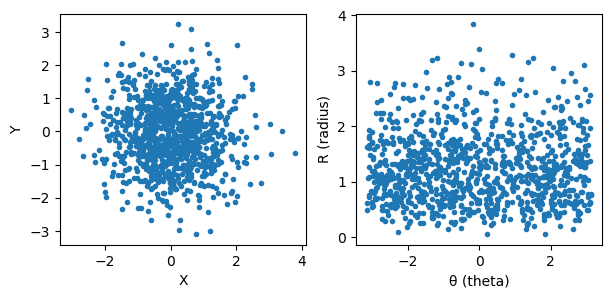

In [129]:
import matplotlib.pyplot as plt  # Import the Matplotlib library for plotting
import numpy as np  # Import the NumPy library for array and mathematical operations
samples = 1000  # Define the number of samples to generate for plotting

# Create a new figure with a size of 7x3 inches for the two subplots
plt.figure(figsize=(7, 3))

# First subplot: Scatter plot of normally distributed random samples
plt.subplot(1, 2, 1)  # Create the first subplot in a 1x2 grid (left side)
 
X = np.random.normal(size=samples)  # Generate 1000 normally distributed random values for X
Y = np.random.normal(size=samples)  # Generate 1000 normally distributed random values for Y
plt.plot(X, Y, ".")  # Plot X vs Y as a scatter plot using dots (".")
plt.xlabel("X")  # Set the x-axis label as "X"
plt.ylabel("Y")  # Set the y-axis label as "Y"

# Second subplot: Convert the Cartesian coordinates (X, Y) to polar coordinates (theta, radius)
plt.subplot(1, 2, 2)  # Create the second subplot in a 1x2 grid (right side)

R = np.sqrt(X * X + Y * Y)  # Calculate the radius R from X and Y using the formula: R = sqrt(X^2 + Y^2)
theta = np.arctan2(Y, X)  # Calculate the angle theta using the arctangent function (arctan2), which accounts for the signs of X and Y
plt.plot(theta, R, ".")  # Plot theta vs R as a scatter plot using dots (".")
plt.xlabel("θ (theta)")  # Set the x-axis label as "θ (theta)" (the angle)
plt.ylabel("R (radius)")  # Set the y-axis label as "R (radius)" (the radial distance from the origin)

plt.show()  # Display the plot with both subplots

A multivariate normal distribution like this with the $X$ and $Y$ dimensions uncorrelated is also called a spherical normal distribution. For these spherical normal distributions, $R$ and $\theta$ are independent. But obviously, both $R$ and $\theta$ are each dependent on both $X$ and $Y$.

So we have $X$ and $R$ are dependent, $R$ and $Y$ are dependent, $Y$ and $\theta$ are dependent, and $\theta$ and $X$ are dependent. But $X$ and $Y$ are not dependent (by definition), and $R$ and $\theta$ are not dependent (because spherical).

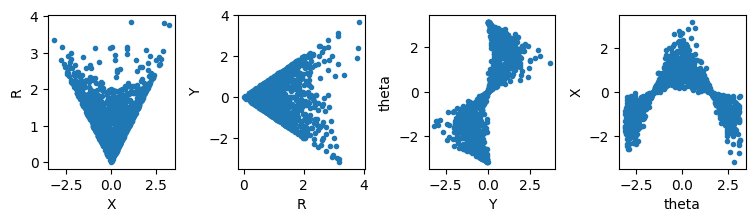

<center>four charts showing dependencies between X and R, R and Y, Y and theta, and theta and X</center>

### Compare and Contrast

- **Common cause**. You may have heard examples of variables that are correlated because of a common cause, not because one variable determined the other.
    - That is essentially the situation in the last dependent variable example chart, where $X$ and $Y$ are both derived from $\theta$. In this case, $\theta$ was the common cause affecting both $X$ and $Y$.
    - A causal relationship between two variables implies a dependence between them, but a dependence between two variables neither means there is a causal connection between them nor does it determine the direction of causality if there is one.
    - The second example of chained dependencies is another example where the direction of causality is ambiguous. The same distribution could be derived by sampling $X$ and $Y$ and calculating $R$ and $\theta$, or sampling $R$ and $\theta$ and calculating $X$ and $Y$.
    - Causality will be one of the main topics of a later module.

## 6.8 Lesson: Correlations Between Random variables
One way to quantify dependence between two random variables is to calculate their correlation. Colloquially, two Boolean random variables are correlated if they tend to happen together more often than by chance. Slightly more formally, we might say that random variables are correlated if they are known to be dependent on each other. The most common mathematical definition of correlation is Pearson's correlation coefficient, which measures linear correlation between random variables. We will investigate that definition of correlation now.

### Definitions:
#### Covariance
The covariance between two random variables $X$ and $Y$, is 
$$
cov(X,Y) = E[(X-E(X))(Y-E(Y))]
$$
The covariance of $X$ with itself is the variance of $X$.

$cov(X,X) = E[(X-E(X))(X-E(X))]$
\
$ = E[(X-E(X))^2]$
\
$ = var(X)$

#### Pearson's Correlation Coefficient

Pearson's correlation coefficient of random variables $X$ and $Y$ is

$$
\rho_{X,Y} = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$

where $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$, respectively.

One interpretation of Pearson's correlation coefficients is that they are a normalized version of covariance. If we refer to the correlation between two variables without any other context, we mean Pearson's correlation coefficient.

The correlation of a random variable with itself is always one.

$$
\rho_{X,Y} = \frac{\text{cov}(X, X)}{\sigma_X \sigma_X}
$$

$$
= \frac{\text{var}(X)}{\text{var}(X)}
$$

$$
= 1
$$

(we ignore the case where $X$ is constant and $\sigma_x = 0$, resulting in 0 divided by 0.

### Example Datasets and Their Correlations
Here's an example of different datasets and their correlations from Wikipedia. 

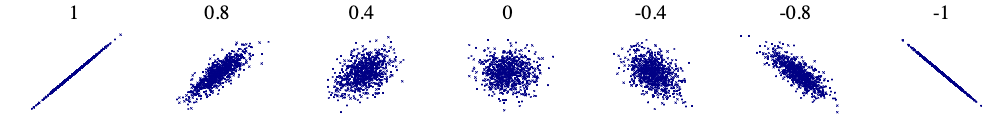

In the first row, the first dataset looks like the $y=x$ line and has correlation 1. Then noise is added to successive datasets in that row until the middle dataset has no visible line and is a ball of points around the origin with correlation zero. Then noise is removed, and the dataset morphs into $y=-x$ at the end of the first row with correlation -1. Moving from either end of the first row to the middle, adding noise reduces the correlation until it is zero.

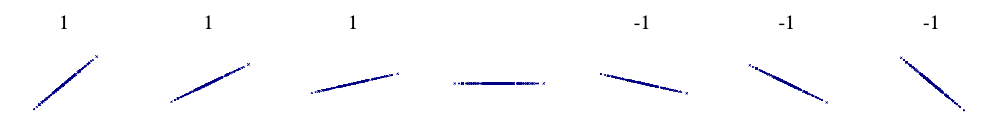

The middle row shows a different transformation from the first dataset with $y=x$ and the last dataset with $y=-x$. Instead of adding and removing noise, the middle row rotates the line counterclockwise. For the middle dataset, the line is horizontal with $y=0$, and the correlation is undefined. To the left of that middle point, where all the lines have positive slope, all the correlations are +1. To the right of that middle point, where all the lines have negative slope, all the correlations are -1. How does that happen? Basically, the magnitudes are canceled out by dividing by the standard deviations, but the signs are not.

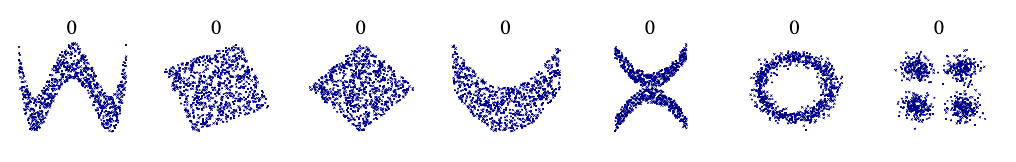

The bottom row shows a variety of datasets drawing pictures. Somewhat cute, and all with zero correlation. Most of them have a horizontal or vertical symmetry that immediately makes the correlation zero. Basically the matching points from the symmetry have opposite signs in the variance summation and cancel each other out.

It should be stressed that despite eight of these datasets having zero correlation, only two of them, Figure 1, fourth graph from the left, and Figure 2, fourth graph from the left, appear to show independent $X$ and $Y$ variables. And the latter of those two has an undefined correlation, not a zero correlation. The other seven datasets with zero correlation have clear dependencies. Those are pretty easy to see—the range of ﻿y﻿ values varies significantly for different $X$ values scanning from left to right.

### Covariance and Correlation of Independent Variables

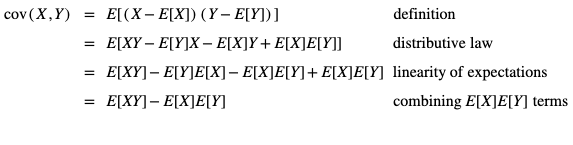

We've glossed over much of the algebraic manipulation of expectations, but it should be straightforward up to this point. What can we do with $E[XY]$?

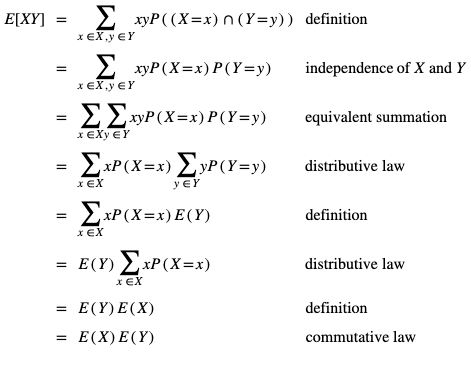

it is not a coincidence that this resembles the $P(A \cap B) = P(A)P(B)$ in the first definition of independence. Resuming the solution of $cov(X,Y)$ when $X$ and $Y$ are independent.

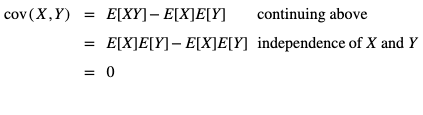

So, if \( X \) and \( Y \) are independent, then their covariance is zero. That sounds suspiciously like independent variables do not vary together. Moving on from the abuse of etymology, but still assuming \( X \) and \( Y \) are independent, and that neither \( X \) nor \( Y \) is a constant, so \( \sigma_X > 0 \) and \( \sigma_Y > 0 \), 

$$
\rho_{X,Y} = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$

$$
= \frac{0}{\sigma_X \sigma_Y}
$$

$$
= 0
$$

So both the covariance and correlation of \( X \) and \( Y \) are zero if \( X \) and \( Y \) are independent.

Note that the equality \( E[XY] = E[X] E[Y] \) is not generally true for all \( X \) and \( Y \). An easy counterexample is \( X = 0, Y = 1 \) or \( X = 0, Y = 1 \) with 50% probability each. \( E[XY] = 0 \) but \( E[X]E[Y] = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4} \).

### Code Example: Computing Covariances and Correlations
Here is sample code to calculate covariances and correlations in Python.

In [130]:
import math
 
def mean(X):
 return sum(X) / len(X)
 
def var(X):
 X_mean = mean(X)
 return mean([(x - X_mean)**2 for x in X])
 
def std(X):
 return math.sqrt(var(X))
 
def cov(X, Y):
 X_mean = mean(X)
 Y_mean = mean(Y)
 
 return mean([(x - X_mean) * (y - Y_mean) for x, y in zip(X, Y)])
 
def corrcoef(X, Y):
 return cov(X, Y) / (std(X) * std(Y))

### Code Notes 
- These functions follow the formulas previously given very closely.
    - Note the use of the mean function for $E[]$ expressions after `mean` is defined.
- These function names were chosen to match the NumPy implementations, so you can swap in `numpy.SAMENAME` or `np.SAMENAME` depending on your imports.
    - NumPy function `numpy.cov`, often referenced as `np.cov`, implements the covariance function.
    - NumPy function `numpy.corrcoef`, often referenced as `np.corrcoef`, implements Pearson's correlation coefficient.

### Chained Correlations and Potential Fallacies
This video discusses potential fallacies when considering chains of correlated variables.

## 6.9 Lesson: Sums of Random Variables

Suppose that $X$ and $Y$ are each random variables with means $\mu_X$ and $\mu_Y$, respectively. Then $X + Y$ has mean $\mu_X + \mu_Y$. This works for any pair of random variables regardless of their distributions or correlations.

### Sums of Independent Normally Distributed Variables

Suppose that $X$ and $Y$ are independent random variables that are normally distributed. Then $X + Y$ is also normally distributed and

$$
\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y)
$$

This simple addition of variance is uncommon and is dependent on both the independence and the normal distributions. However, if both conditions hold, reasoning about sums of those random variables is very easy.

### Sums of Correlated Normally Distributed Variables

#### Definition: Linear Combination of Random Variables

Given a set of variables $X_1,\dots, X_n$, $Z$ is a linear combination of $X_1, \dots, X_n$ if $Z = f(X_1, \dots, X_n)$ for any linear function $f$.

#### Definition: Multivariate Normal Distribution

A set of variables $X_1, \dots, X_n$ has a multivariate normal distribution if every linear combination of $X_1, \dots, X_n$ is normally distributed.

Suppose that $X$ and $Y$ have a multivariate normal distribution, and $X$ and $Y$ have correlation $\rho$. Then

$$
\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y) + 2\rho \sqrt{\text{Var}(X)\text{Var}(Y)}
$$

This formula can be used further to calculate the variance of any linear combination of $X$ and $Y$. Also note that this simplifies to the formula for independent normal variables since $\rho = 0$ in that case.

In [134]:
x = np.arange(5)
y = 3 * x - 9
y

array([-9, -6, -3,  0,  3])

In [135]:
correlation_matrix = np.corrcoef(x, y)

# Access the correlation coefficient (r)
correlation_coefficient = correlation_matrix[0, 1]

print(correlation_coefficient)

1.0


$$ Var(X + Y) = 1 + 1 + 2 \cdot Cov(X, Y) = 2 + 2 \cdot Cov(X, Y) $$

Let's analyze the provided options using properties of variance and covariance for random variables:

1. **Variance formula**:  
   For two random variables \( X \) and \( Y \), the variance of their sum is given by:
   $$ Var(X + Y) = Var(X) + Var(Y) + 2 \cdot Cov(X, Y) $$
   We are told that \( Var(X) = Var(Y) = 1 \), so:
   $$ Var(X + Y) = 1 + 1 + 2 \cdot Cov(X, Y) = 2 + 2 \cdot Cov(X, Y) $$

2. Now, let's evaluate each option:

   - **A**: \( Var(X + Y) = 1 \) and they have a multivariate distribution.  
     From the variance formula, this implies:
     $$ 2 + 2 \cdot Cov(X, Y) = 1 $$
     Solving for \( Cov(X, Y) \):
     $$ 2 \cdot Cov(X, Y) = -1 \quad \Rightarrow \quad Cov(X, Y) = -\frac{1}{2} $$
     This is possible and consistent with a multivariate distribution where \( X \) and \( Y \) are negatively correlated.

   - **B**: \( Var(X + Y) = -1 \) and they have a multivariate distribution.  
     Variance cannot be negative, so this is **not possible**.

   - **C**: \( Var(X + Y) = 0 \) and they have zero correlation.  
     If \( Var(X + Y) = 0 \), then from the variance formula:
     $$ 2 + 2 \cdot Cov(X, Y) = 0 $$
     Solving for \( Cov(X, Y) \):
     $$ Cov(X, Y) = -1 $$
     This means \( X \) and \( Y \) are perfectly negatively correlated, not zero correlation, so this option is **not true**.

   - **D**: \( Var(X + Y) = 0 \) and they are positively correlated.  
     As we saw above, if \( Var(X + Y) = 0 \), then \( Cov(X, Y) = -1 \), which implies they are **negatively correlated**, not positively. So this option is also **not true**.

### Conclusion:
The only true statement is **A**: \( Var(X + Y) = 1 \) and they have a multivariate distribution.

In [7]:
import numpy as np

# Example X and Y data for a circle (from the plot)
x15 = np.linspace(-5, 5, 1000)
y_upper = np.sqrt(25 - x15**2)  # Upper half of the circle
y_lower = -np.sqrt(25 - x15**2)  # Lower half of the circle

# Combine upper and lower parts for a full circle
y = np.concatenate([y_upper, y_lower])
x = np.concatenate([x15, x15])

# Calculate Pearson correlation
correlation = np.corrcoef(x, y)[0,1]
print("Pearson correlation:", correlation)

Pearson correlation: 4.3388249342288584e-17


In [6]:
x15 = np.linspace(-5, 5, 1000) #x in all cases
y_upper = np.sqrt(25 - x15**2)  # Upper half of the circle
y_lower = -np.sqrt(25 - x15**2)  # Lower half of the circle

tophalfpearson = np.corrcoef(x15, y_upper)
tophalfpearson

array([[1.00000000e+00, 2.10247868e-16],
       [2.10247868e-16, 1.00000000e+00]])

In [1]:
import numpy as np

In [2]:
np.array([6.56062922, 8.05149003, 4.24825307, 5.89800431, 4.12968898,
               6.16117527, 5.38907131, 5.41404083, 6.3995269 , 6.78634137,
               6.22796981, 4.55988226, 4.9809148 , 5.91523237, 4.91523075,
               7.3028712 , 6.87122171, 4.52565906, 5.76434526, 5.31604651,
               7.25063809, 4.24643004, 6.52987363, 6.05757534, 6.82386797,
               7.48022126, 5.87533487, 7.02742514, 7.20382545, 5.82672641,
               6.71389979, 5.11077349, 7.67843799, 5.66464224, 5.7092994 ,
               3.2572212 , 5.78109917, 5.39459858, 6.60992302, 5.93070358,
               7.10773652, 5.64892364, 3.68849504, 4.8451847 , 6.01534183,
               4.38000276, 7.41563945, 6.89014792, 7.77834674, 5.5368395 ,
               5.38465388, 4.73294996, 5.58649916, 5.99128937, 6.38058961,
               6.70626205, 5.59526173, 4.36179211, 3.62537513, 5.78922944,
               5.79315919, 7.23886723, 5.1127356 , 3.5490225 , 5.80299017,
               7.76573873, 3.21114127, 3.41482157, 8.80317566, 5.17321002,
               4.46293046, 4.81839111, 4.79710526, 5.9317453 , 5.08618734,
               5.8507972 , 7.30433857, 4.26087762, 5.50748049, 5.31339463,
               4.33992787, 6.44657891, 6.29622774, 4.81904013, 6.65312179,
               7.4858895 , 4.54967638, 4.70464419, 5.29373718, 6.83796865,
               6.39806464, 8.06565846, 7.36787739, 7.0795772 , 5.98787754,
               6.40424913, 6.3692323 , 6.6040807 , 5.7100411 , 5.09037487]) == np.array([6.56062922, 8.05149003, 4.24825307, 5.89800431, 4.12968898,
       6.16117527, 5.38907131, 5.41404083, 6.3995269 , 6.78634137,
       6.22796981, 4.55988226, 4.9809148 , 5.91523237, 4.91523075,
       7.3028712 , 6.87122171, 4.52565906, 5.76434526, 5.31604651,
       7.25063809, 4.24643004, 6.52987363, 6.05757534, 6.82386797,
       7.48022126, 5.87533487, 7.02742514, 7.20382545, 5.82672641,
       6.71389979, 5.11077349, 7.67843799, 5.66464224, 5.7092994 ,
       3.2572212 , 5.78109917, 5.39459858, 6.60992302, 5.93070358,
       7.10773652, 5.64892364, 3.68849504, 4.8451847 , 6.01534183,
       4.38000276, 7.41563945, 6.89014792, 7.77834674, 5.5368395 ,
       5.38465388, 4.73294996, 5.58649916, 5.99128937, 6.38058961,
       6.70626205, 5.59526173, 4.36179211, 3.62537513, 5.78922944,
       5.79315919, 7.23886723, 5.1127356 , 3.5490225 , 5.80299017,
       7.76573873, 3.21114127, 3.41482157, 8.80317566, 5.17321002,
       4.46293046, 4.81839111, 4.79710526, 5.9317453 , 5.08618734,
       5.8507972 , 7.30433857, 4.26087762, 5.50748049, 5.31339463,
       4.33992787, 6.44657891, 6.29622774, 4.81904013, 6.65312179,
       7.4858895 , 4.54967638, 4.70464419, 5.29373718, 6.83796865,
       6.39806464, 8.06565846, 7.36787739, 7.0795772 , 5.98787754,
       6.40424913, 6.3692323 , 6.6040807 , 5.7100411 , 5.09037487])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [3]:
import numpy as np
from scipy.stats import norm

# The full array of q6
q6 = np.array([6.56062922, 8.05149003, 4.24825307, 5.89800431, 4.12968898,
               6.16117527, 5.38907131, 5.41404083, 6.3995269 , 6.78634137,
               6.22796981, 4.55988226, 4.9809148 , 5.91523237, 4.91523075,
               7.3028712 , 6.87122171, 4.52565906, 5.76434526, 5.31604651,
               7.25063809, 4.24643004, 6.52987363, 6.05757534, 6.82386797,
               7.48022126, 5.87533487, 7.02742514, 7.20382545, 5.82672641,
               6.71389979, 5.11077349, 7.67843799, 5.66464224, 5.7092994 ,
               3.2572212 , 5.78109917, 5.39459858, 6.60992302, 5.93070358,
               7.10773652, 5.64892364, 3.68849504, 4.8451847 , 6.01534183,
               4.38000276, 7.41563945, 6.89014792, 7.77834674, 5.5368395 ,
               5.38465388, 4.73294996, 5.58649916, 5.99128937, 6.38058961,
               6.70626205, 5.59526173, 4.36179211, 3.62537513, 5.78922944,
               5.79315919, 7.23886723, 5.1127356 , 3.5490225 , 5.80299017,
               7.76573873, 3.21114127, 3.41482157, 8.80317566, 5.17321002,
               4.46293046, 4.81839111, 4.79710526, 5.9317453 , 5.08618734,
               5.8507972 , 7.30433857, 4.26087762, 5.50748049, 5.31339463,
               4.33992787, 6.44657891, 6.29622774, 4.81904013, 6.65312179,
               7.4858895 , 4.54967638, 4.70464419, 5.29373718, 6.83796865,
               6.39806464, 8.06565846, 7.36787739, 7.0795772 , 5.98787754,
               6.40424913, 6.3692323 , 6.6040807 , 5.7100411 , 5.09037487])

# Measurement to compare
s6 = 5.3

# Step 1: Calculate the mean and sample standard deviation of q6 (ddof=1 for sample std deviation)
mean = np.mean(q6)
std = np.std(q6, ddof=1)  # ddof=1 for sample standard deviation

# Step 2: Compute p6 as the CDF of s6 in the sample distribution of q6
p6 = norm.cdf(s6, loc=mean, scale=std)

# Output the result
print(f"p6 = {p6:.10f}")

p6 = 0.3271579179


In [4]:
import numpy as np

# Full array of q6
q6 = np.array([6.56062922, 8.05149003, 4.24825307, 5.89800431, 4.12968898,
               6.16117527, 5.38907131, 5.41404083, 6.3995269 , 6.78634137,
               6.22796981, 4.55988226, 4.9809148 , 5.91523237, 4.91523075,
               7.3028712 , 6.87122171, 4.52565906, 5.76434526, 5.31604651,
               7.25063809, 4.24643004, 6.52987363, 6.05757534, 6.82386797,
               7.48022126, 5.87533487, 7.02742514, 7.20382545, 5.82672641,
               6.71389979, 5.11077349, 7.67843799, 5.66464224, 5.7092994 ,
               3.2572212 , 5.78109917, 5.39459858, 6.60992302, 5.93070358,
               7.10773652, 5.64892364, 3.68849504, 4.8451847 , 6.01534183,
               4.38000276, 7.41563945, 6.89014792, 7.77834674, 5.5368395 ,
               5.38465388, 4.73294996, 5.58649916, 5.99128937, 6.38058961,
               6.70626205, 5.59526173, 4.36179211, 3.62537513, 5.78922944,
               5.79315919, 7.23886723, 5.1127356 , 3.5490225 , 5.80299017,
               7.76573873, 3.21114127, 3.41482157, 8.80317566, 5.17321002,
               4.46293046, 4.81839111, 4.79710526, 5.9317453 , 5.08618734,
               5.8507972 , 7.30433857, 4.26087762, 5.50748049, 5.31339463,
               4.33992787, 6.44657891, 6.29622774, 4.81904013, 6.65312179,
               7.4858895 , 4.54967638, 4.70464419, 5.29373718, 6.83796865,
               6.39806464, 8.06565846, 7.36787739, 7.0795772 , 5.98787754,
               6.40424913, 6.3692323 , 6.6040807 , 5.7100411 , 5.09037487])

# Measurement to compare
s6 = 5.3

# Step 1: Sort q6 for empirical CDF calculation
sorted_q6 = np.sort(q6)

# Step 2: Compute empirical CDF by counting how many values are less than or equal to s6
p6 = np.searchsorted(sorted_q6, s6, side='right') / len(q6)

# Output the result
print(f"Empirical p6 = {p6:.10f}")

Empirical p6 = 0.3100000000
